In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC


In [3]:
# Define data directory and file names
data_directory = r'C:\Users\headc\Documents\Bellevue\DSC680\Project 1\Data'
file_names = ['profile.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'CE.txt', 'CP.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'SE.txt', 'TS1.txt', 
              'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']

# Create an dictionary 
dataframes = {}

# Iterate through each file name and store into dictionary from text file
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)
    df = pd.read_csv(file_path, delimiter='\t')  
    
    # remove file extension when saving dataframe name
    dataframes[file_name.split('.')[0]] = df

In [4]:
# Print test dataframe to verify upload
print("DataFrame for 'profile.txt':")
print(dataframes['profile'])

DataFrame for 'profile.txt':
        3  100  0  130  1
0       3  100  0  130  1
1       3  100  0  130  1
2       3  100  0  130  1
3       3  100  0  130  1
4       3  100  0  130  1
...   ...  ... ..  ... ..
2199  100  100  0   90  0
2200  100  100  0   90  0
2201  100  100  0   90  0
2202  100  100  0   90  0
2203  100  100  0   90  0

[2204 rows x 5 columns]


In [5]:
# Add column names to the existing 'profiles' DataFrame based on description text file
dataframes['profile'].columns = [
    'Cooler_condition',
    'Valve_condition',
    'Internal_pump_leakage',
    'Hydraulic_accumulator',
    'Stable_flag'
]

# Print the updated 'profiles' DataFrame
print("Updated 'profiles' DataFrame:")
print(dataframes['profile'])

Updated 'profiles' DataFrame:
      Cooler_condition  Valve_condition  Internal_pump_leakage  \
0                    3              100                      0   
1                    3              100                      0   
2                    3              100                      0   
3                    3              100                      0   
4                    3              100                      0   
...                ...              ...                    ...   
2199               100              100                      0   
2200               100              100                      0   
2201               100              100                      0   
2202               100              100                      0   
2203               100              100                      0   

      Hydraulic_accumulator  Stable_flag  
0                       130            1  
1                       130            1  
2                       130            1  
3    

In [6]:
# Print the DataFrame for PS1 sensor
print("DataFrame for 'PS1.txt':")
print(dataframes['PS1'])

DataFrame for 'PS1.txt':
      151.47  151.45  151.52  151.27   150.8  150.69  153.89  154.67  152.88  \
0     151.11  151.12  151.16  150.92  150.70  150.62  152.40  153.21  152.81   
1     150.81  150.79  150.84  150.65  150.35  150.23  152.03  152.81  152.44   
2     150.48  150.47  150.52  150.31  150.04  149.98  151.63  152.48  152.24   
3     150.41  150.35  150.24  150.12  149.87  149.71  151.64  152.37  151.78   
4     150.27  150.20  150.16  149.93  149.57  149.46  151.16  152.05  151.81   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2199  151.70  151.83  151.90  151.75  151.62  151.63  153.78  154.73  153.83   
2200  151.90  151.83  151.81  151.77  151.65  151.63  153.97  154.84  153.67   
2201  151.73  151.78  151.84  151.62  151.46  151.49  153.91  154.88  153.69   
2202  151.77  151.77  151.75  151.56  151.47  151.57  154.09  154.80  153.45   
2203  151.83  151.78  151.77  151.65  151.49  151.48  154.00  154.77  153.48   

      153.82  

In [7]:
# List of names dataframes
dataframe_names = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'CE', 'CP', 'EPS1', 'FS1', 'FS2', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1']

# Define sensor information from text file description
sensor_info = {
    'PS1': {'sensor_name': 'PS1', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'PS2': {'sensor_name': 'PS2', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'PS3': {'sensor_name': 'PS3', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'PS4': {'sensor_name': 'PS4', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'PS5': {'sensor_name': 'PS5', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'PS6': {'sensor_name': 'PS6', 'physical_quantity': 'Pressure', 'unit': 'bar', 'sampling_rate': '100 Hz'},
    'CE': {'sensor_name': 'CE', 'physical_quantity': 'Cooling Efficiency', 'unit': '%', 'sampling_rate': '1 Hz'},
    'CP': {'sensor_name': 'CP', 'physical_quantity': 'Cooling Power', 'unit': 'kW', 'sampling_rate': '1 Hz'},
    'EPS1': {'sensor_name': 'EPS1', 'physical_quantity': 'Motor Power', 'unit': 'W', 'sampling_rate': '100 Hz'},
    'FS1': {'sensor_name': 'FS1', 'physical_quantity': 'Volume Flow', 'unit': 'l/min', 'sampling_rate': '10 Hz'},
    'FS2': {'sensor_name': 'FS2', 'physical_quantity': 'Volume Flow', 'unit': 'l/min', 'sampling_rate': '10 Hz'},
    'SE': {'sensor_name': 'SE', 'physical_quantity': 'Efficiency Factor', 'unit': '%', 'sampling_rate': '1 Hz'},
    'TS1': {'sensor_name': 'TS1', 'physical_quantity': 'Temperature', 'unit': '°C', 'sampling_rate': '1 Hz'},
    'TS2': {'sensor_name': 'TS2', 'physical_quantity': 'Temperature', 'unit': '°C', 'sampling_rate': '1 Hz'},
    'TS3': {'sensor_name': 'TS3', 'physical_quantity': 'Temperature', 'unit': '°C', 'sampling_rate': '1 Hz'},
    'TS4': {'sensor_name': 'TS4', 'physical_quantity': 'Temperature', 'unit': '°C', 'sampling_rate': '1 Hz'},
    'VS1': {'sensor_name': 'VS1', 'physical_quantity': 'Vibration', 'unit': 'mm/s', 'sampling_rate': '1 Hz'},
}

# Loop through each DataFrame and add columns based on sensor_info
for name in dataframe_names:
    info = sensor_info[name]
    # Calculate the number of data points within a cycle based on the sampling rate (This was needed after continuously erroring after the 100Hz rate switched)
    if 'Hz' in info['sampling_rate']:
        data_points_per_cycle = int(info['sampling_rate'].split()[0]) * 60
    else:
        data_points_per_cycle = 60

    column_names = [f"{info['sensor_name']}_{i+1}_{info['physical_quantity']}_{info['unit']}_{info['sampling_rate']}" for i in range(data_points_per_cycle)]

    num_columns = len(dataframes[name].columns)
    
    # Check for a mismatch and then set column name if correct
    if num_columns != len(column_names):
        print(f"\nError: Number of columns mismatch for '{name}' DataFrame!")
        print(f"Expected: {num_columns}, Actual: {len(column_names)}")
    else:
        dataframes[name].columns = column_names

        # Print the updated DataFrame with column names
        print(f"\nUpdated '{name}' DataFrame with column names:")
        print(dataframes[name].head())


Updated 'PS1' DataFrame with column names:
   PS1_1_Pressure_bar_100 Hz  PS1_2_Pressure_bar_100 Hz  \
0                     151.11                     151.12   
1                     150.81                     150.79   
2                     150.48                     150.47   
3                     150.41                     150.35   
4                     150.27                     150.20   

   PS1_3_Pressure_bar_100 Hz  PS1_4_Pressure_bar_100 Hz  \
0                     151.16                     150.92   
1                     150.84                     150.65   
2                     150.52                     150.31   
3                     150.24                     150.12   
4                     150.16                     149.93   

   PS1_5_Pressure_bar_100 Hz  PS1_6_Pressure_bar_100 Hz  \
0                     150.70                     150.62   
1                     150.35                     150.23   
2                     150.04                     149.98   
3         

In [8]:
# Check VS1, Difference in sampling rate caused issues in column naming
print("DataFrame for 'VS1.txt':")
print(dataframes['VS1'])

DataFrame for 'VS1.txt':
      VS1_1_Vibration_mm/s_1 Hz  VS1_2_Vibration_mm/s_1 Hz  \
0                         0.590                      0.610   
1                         0.578                      0.603   
2                         0.565                      0.591   
3                         0.570                      0.600   
4                         0.568                      0.601   
...                         ...                        ...   
2199                      0.558                      0.584   
2200                      0.566                      0.569   
2201                      0.566                      0.562   
2202                      0.529                      0.539   
2203                      0.541                      0.553   

      VS1_3_Vibration_mm/s_1 Hz  VS1_4_Vibration_mm/s_1 Hz  \
0                         0.626                      0.620   
1                         0.638                      0.651   
2                         0.608             

In [9]:
# Look at column names in profile to select y of models
print(dataframes['profile'].columns)

Index(['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage',
       'Hydraulic_accumulator', 'Stable_flag'],
      dtype='object')


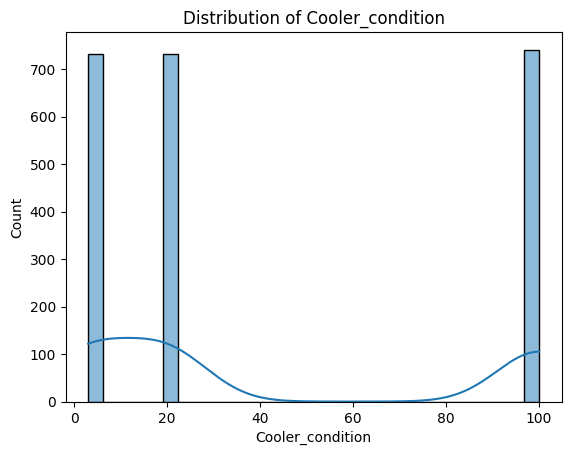

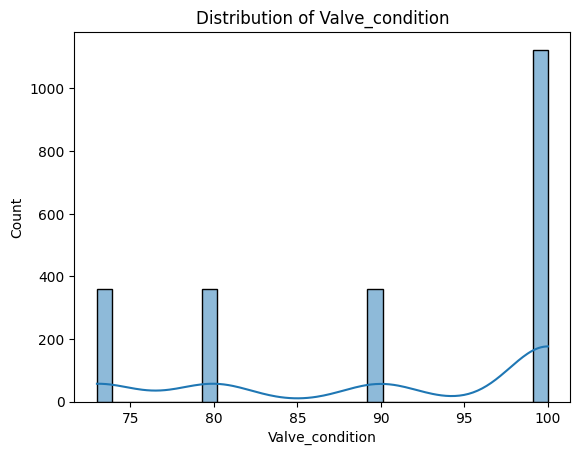

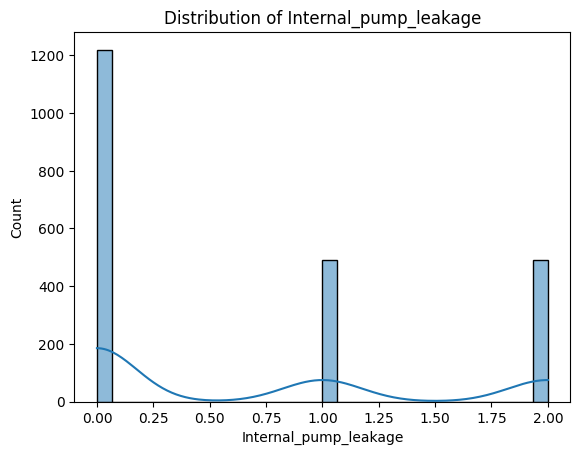

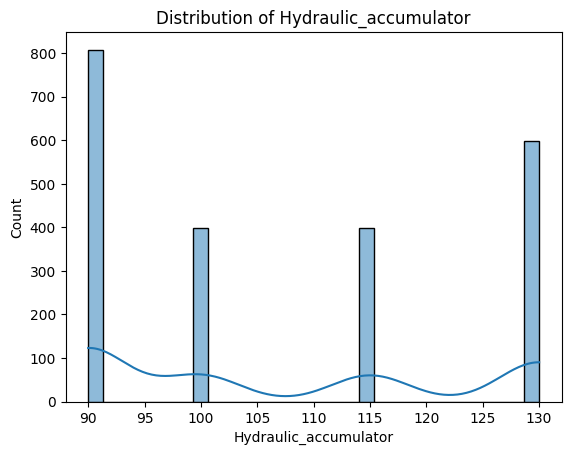

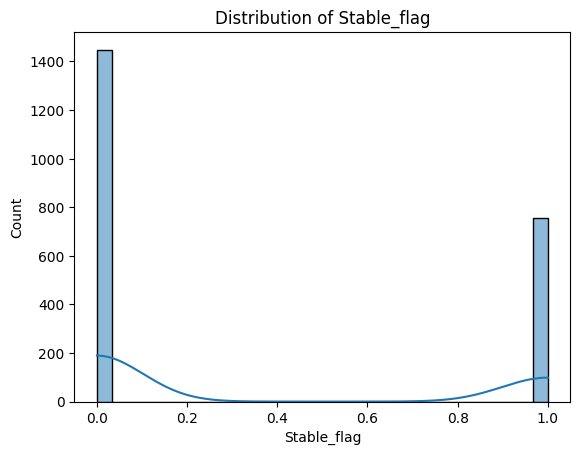

In [10]:
# Visual Distributions for PS1 data
for column in dataframes['profile'].columns:
    sns.histplot(dataframes['profile'][column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [11]:
# Define target variable
y = dataframes['profile']['Cooler_condition'] # Selected basede on wanting to predict failures 
y_alternative = dataframes['profile']['Stable_flag'] 

# Define feature matrix for PS1 sensor
X_ps1 = dataframes['PS1']

# Define feature matrix for VS1 sensor
X_vs1 = dataframes['VS1']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ps1, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shapes - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X: {}, y: {}".format(X_test.shape, y_test.shape))

Training set shapes - X: (1763, 6000), y: (1763,)
Testing set shapes - X: (441, 6000), y: (441,)


In [13]:
# Initialize the label encoder then fit and transform target for training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBoost classifier and train the model on the training set
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Transform the target variable for testing set, then predict on that set
y_test_encoded = label_encoder.transform(y_test)
y_pred = xgb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy for PS1:", accuracy)

# Print metrics
print("\nClassification Report for PS1:")
print(classification_report(y_test_encoded, y_pred))

print("\nConfusion Matrix for PS1:")
print(confusion_matrix(y_test_encoded, y_pred))

Accuracy for PS1: 0.9977324263038548

Classification Report for PS1:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00       157

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441


Confusion Matrix for PS1:
[[156   1   0]
 [  0 127   0]
 [  0   0 157]]


In [14]:
# Split the data into training and testing sets for VS1 sensor
X_train_vs1, X_test_vs1, y_train_vs1, y_test_vs1 = train_test_split(X_vs1, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shapes - X: {}, y: {}".format(X_train_vs1.shape, y_train_vs1.shape))
print("Testing set shapes - X: {}, y: {}".format(X_test_vs1.shape, y_test_vs1.shape))

Training set shapes - X: (1763, 60), y: (1763,)
Testing set shapes - X: (441, 60), y: (441,)


In [15]:
# Initialize the label encoder then fit and transform target for training set
label_encoder = LabelEncoder()
y_train_encoded_vs1 = label_encoder.fit_transform(y_train_vs1)

# Initialize the XGBoost classifier and train the model on the training set
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_vs1, y_train_encoded_vs1)

# Transform the target variable for testing set, then predict on that set
y_test_encoded_vs1 = label_encoder.transform(y_test_vs1)
y_pred_vs1 = xgb_model.predict(X_test_vs1)

# Evaluate the model performance
accuracy_vs1 = accuracy_score(y_test_encoded_vs1, y_pred_vs1)
print("Accuracy for VS1:", accuracy_vs1)

# Print metrics
print("\nClassification Report for VS1:")
print(classification_report(y_test_encoded_vs1, y_pred_vs1))

print("\nConfusion Matrix for VS1:")
print(confusion_matrix(y_test_encoded_vs1, y_pred_vs1))

Accuracy for VS1: 0.9886621315192744

Classification Report for VS1:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       157
           1       0.98      0.99      0.98       127
           2       1.00      0.97      0.99       157

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441


Confusion Matrix for VS1:
[[157   0   0]
 [  1 126   0]
 [  1   3 153]]


In [16]:
# Initialize the RandomForestClassifier and train on model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9863945578231292

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.97      0.99      0.98       157
          20       0.98      1.00      0.99       127
         100       1.00      0.97      0.99       157

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441


Random Forest Confusion Matrix:
[[155   2   0]
 [  0 127   0]
 [  4   0 153]]


In [17]:
# Standardize the data by using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model and train on the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set and evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy_ps1 = accuracy_score(y_test, y_pred)
conf_matrix_ps1 = confusion_matrix(y_test, y_pred)
classification_rep_ps1 = classification_report(y_test, y_pred)
predictions_ps1 = svm_model.predict(X_train_scaled)

# Print metrics
print("Accuracy for PS1:", accuracy_ps1)
print("Confusion Matrix for PS1:\n", conf_matrix_ps1)
print("Classification Report for PS1:\n", classification_rep_ps1)
print("Predictions for PS1:\n", predictions_ps1)

Accuracy for PS1: 0.9886621315192744
Confusion Matrix for PS1:
 [[154   3   0]
 [  1 126   0]
 [  0   1 156]]
Classification Report for PS1:
               precision    recall  f1-score   support

           3       0.99      0.98      0.99       157
          20       0.97      0.99      0.98       127
         100       1.00      0.99      1.00       157

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441

Predictions for PS1:
 [100   3  20 ...  20  20  20]


In [18]:
# Define target variable for VS1
y_vs1 = dataframes['profile']['Cooler_condition']

# Define feature matrix for VS1
X_vs1 = dataframes['VS1']

# Split the data into training and testing sets for VS1
X_train_vs1, X_test_vs1, y_train_vs1, y_test_vs1 = train_test_split(X_vs1, y_vs1, test_size=0.2, random_state=42)

In [19]:
# Train SVM model for VS1
svm_model_vs1 = SVC(random_state=42)
svm_model_vs1.fit(X_train_vs1, y_train_vs1)

# Make predictions for VS1
predictions_vs1 = svm_model_vs1.predict(X_test_vs1)

# Evaluate and Print metrics for VS1
accuracy_vs1 = accuracy_score(y_test_vs1, predictions_vs1)
print("SVM Accuracy for VS1:", accuracy_vs1)

SVM Accuracy for VS1: 0.9795918367346939


In [20]:
# Evaluate the model for VS1
accuracy_vs1 = accuracy_score(y_test, predictions_vs1)
conf_matrix_vs1 = confusion_matrix(y_test, predictions_vs1)
classification_rep_vs1 = classification_report(y_test, predictions_vs1)

# Print metrics for VS1
print("Accuracy for VS1:", accuracy_vs1)
print("Confusion Matrix for VS1:\n", conf_matrix_vs1)
print("Classification Report for VS1:\n", classification_rep_vs1)


Accuracy for VS1: 0.9795918367346939
Confusion Matrix for VS1:
 [[152   5   0]
 [  0 127   0]
 [  0   4 153]]
Classification Report for VS1:
               precision    recall  f1-score   support

           3       1.00      0.97      0.98       157
          20       0.93      1.00      0.97       127
         100       1.00      0.97      0.99       157

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441



In [21]:
# Alternative y selected ('Stable_Flag')
# Split the data into training and testing sets
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_ps1, y_alternative, test_size=0.2, random_state=42)

# Initialize the label encoder then fit and transform the target for training set
label_encoder_alt = LabelEncoder()
y_train_encoded_alt = label_encoder_alt.fit_transform(y_train_alt)

# Initialize the XGBoost classifier and train the model
xgb_model_alt = XGBClassifier(random_state=42)
xgb_model_alt.fit(X_train_alt, y_train_encoded_alt)

# Transform the target variable for the testing set
y_test_encoded_alt = label_encoder_alt.transform(y_test_alt)

# Make predictions oand Evaluate the models performance
y_pred_alt = xgb_model_alt.predict(X_test_alt)
accuracy_alt = accuracy_score(y_test_encoded_alt, y_pred_alt)
print("Accuracy for PS1:", accuracy_alt)

# Print metrics
print("\nClassification Report for PS1:")
print(classification_report(y_test_encoded_alt, y_pred_alt))

print("\nConfusion Matrix for PS1:")
print(confusion_matrix(y_test_encoded_alt, y_pred_alt))

Accuracy for PS1: 0.9841269841269841

Classification Report for PS1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       295
           1       0.99      0.97      0.98       146

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441


Confusion Matrix for PS1:
[[293   2]
 [  5 141]]


In [22]:
# Alternative y selected ('Stable_Flag')
# Split the data into training and testing sets
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_vs1, y_alternative, test_size=0.2, random_state=42)

# Initialize the label encoder then fit and transform the target for training set
label_encoder_alt = LabelEncoder()
y_train_encoded_alt = label_encoder_alt.fit_transform(y_train_alt)

# Initialize the XGBoost classifier and train the model
xgb_model_alt = XGBClassifier(random_state=42)
xgb_model_alt.fit(X_train_alt, y_train_encoded_alt)

# Transform the target variable for the testing set
y_test_encoded_alt = label_encoder_alt.transform(y_test_alt)

# Make predictions oand Evaluate the models performance
y_pred_alt = xgb_model_alt.predict(X_test_alt)
accuracy_alt = accuracy_score(y_test_encoded_alt, y_pred_alt)
print("Accuracy for VS1:", accuracy_alt)

# Print metrics
print("\nClassification Report for VS1:")
print(classification_report(y_test_encoded_alt, y_pred_alt))

print("\nConfusion Matrix for VS1:")
print(confusion_matrix(y_test_encoded_alt, y_pred_alt))

Accuracy for VS1: 0.8639455782312925

Classification Report for VS1:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       295
           1       0.83      0.74      0.78       146

    accuracy                           0.86       441
   macro avg       0.85      0.83      0.84       441
weighted avg       0.86      0.86      0.86       441


Confusion Matrix for VS1:
[[273  22]
 [ 38 108]]


In [23]:
# Feature Importance Random Forest Model
feature_importance_rf = rf_model.feature_importances_

# Feature Importance XGBoost model
feature_importance_xgb = xgb_model.get_booster().get_score(importance_type='weight')

# Print scores
print("Random Forest Feature Importance:")
print(feature_importance_rf)

print("\nXGBoost Feature Importance:")
print(feature_importance_xgb)

Random Forest Feature Importance:
[0.00000000e+00 8.47875740e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 8.24151365e-05]

XGBoost Feature Importance:
{'VS1_1_Vibration_mm/s_1 Hz': 7.0, 'VS1_2_Vibration_mm/s_1 Hz': 36.0, 'VS1_3_Vibration_mm/s_1 Hz': 38.0, 'VS1_4_Vibration_mm/s_1 Hz': 65.0, 'VS1_5_Vibration_mm/s_1 Hz': 24.0, 'VS1_6_Vibration_mm/s_1 Hz': 14.0, 'VS1_7_Vibration_mm/s_1 Hz': 23.0, 'VS1_8_Vibration_mm/s_1 Hz': 46.0, 'VS1_9_Vibration_mm/s_1 Hz': 69.0, 'VS1_10_Vibration_mm/s_1 Hz': 5.0, 'VS1_11_Vibration_mm/s_1 Hz': 38.0, 'VS1_12_Vibration_mm/s_1 Hz': 26.0, 'VS1_13_Vibration_mm/s_1 Hz': 11.0, 'VS1_14_Vibration_mm/s_1 Hz': 16.0, 'VS1_15_Vibration_mm/s_1 Hz': 9.0, 'VS1_16_Vibration_mm/s_1 Hz': 3.0, 'VS1_17_Vibration_mm/s_1 Hz': 32.0, 'VS1_18_Vibration_mm/s_1 Hz': 1.0, 'VS1_19_Vibration_mm/s_1 Hz': 17.0, 'VS1_20_Vibration_mm/s_1 Hz': 13.0, 'VS1_21_Vibration_mm/s_1 Hz': 1.0, 'VS1_22_Vibration_mm/s_1 Hz': 19.0, 'VS1_23_Vibration_mm/s_1 Hz': 18.0, 'VS1_24_Vibration_mm/s_1 H